Define function which performs cumulative average calculations to create the desired features

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
root = '/content/drive/MyDrive/Andreas personal project'

In [ ]:
def result(row):
    if row['GF'] == row['GA']:
        res = 'Draw'
    elif row['GF'] > row['GA'] and row['Team Venue'] == 'Home' or row['GF'] < row['GA'] and row['Team Venue'] == 'Away':
        res = 'Home Win'
    else:
        res = 'Away Win'
    return res



In [ ]:
import pandas as pd
import numpy as np

def myfunction(team):
  df_team = pd.read_csv(team)
  df_team = df_team.drop(columns=['Time', 'Day', 'Gls', 'SoT','SoT%','G/Sh','G/SoT','Dist','FK','PK','PKatt','npxG','npxG/Sh','G-xG','np:G-xG','Match Report'])
  df_team.dropna(inplace = True)
  df_team.drop(index=df_team[df_team['Sh'] == 'Sh'].index, inplace=True)
  df_team['Filename'] = os.path.basename(team)
  df_team[['Team','Extra']] = df_team['Filename'].str.split('_', expand=True)
  df_team = df_team.drop(columns=['Filename', 'Extra'])
  df_team.rename(columns={'Venue':'Team Venue', 'Result': 'Result(For Team)'},inplace=True)
  df_team['Match Result'] = df_team.apply(result, axis=1)
  df_team.insert(4, 'Match Result', df_team.pop('Match Result'))
  df_team.insert(2, 'Team', df_team.pop('Team'))
  df_team['cumulative_avg_xG_utpm'] = df_team['xG'].expanding().mean()
  df_team['cumulative_avg_GF_utpm'] = df_team['GF'].expanding().mean()
  df_team['cumulative_avg_GA_utpm'] = df_team['GA'].expanding().mean()
  df_team['cumulative_avg_shots_utpm'] = df_team['Sh'].expanding().mean()
  df_team['avg_xG_last_3']= df_team['xG'].rolling(3).mean()
  df_team['avg_GF_last_3']= df_team['GF'].rolling(3).mean()
  df_team['avg_GA_last_3']= df_team['GA'].rolling(3).mean()
  df_team['avg_Sh_last_3']= df_team['Sh'].rolling(3).mean()
  df_team['last_match_xG']= df_team['xG'].rolling(1).mean()
  df_team['last_match_GF']= df_team['GF'].rolling(1).mean()
  df_team['last_match_GA']= df_team['GA'].rolling(1).mean()
  df_team['last_match_Sh']= df_team['Sh'].rolling(1).mean()
  df_team[['cumulative_avg_xG_utpm', 'cumulative_avg_GF_utpm', 'cumulative_avg_GA_utpm', 'cumulative_avg_shots_utpm','avg_xG_last_3','avg_GF_last_3','avg_GA_last_3','avg_Sh_last_3','last_match_xG','last_match_GF','last_match_GA','last_match_Sh']] = df_team[['cumulative_avg_xG_utpm','cumulative_avg_GF_utpm', 'cumulative_avg_GA_utpm', 'cumulative_avg_shots_utpm','avg_xG_last_3','avg_GF_last_3','avg_GA_last_3','avg_Sh_last_3','last_match_xG','last_match_GF','last_match_GA','last_match_Sh']].shift(1,freq=None,axis=0)
  df_team = df_team.reset_index(drop=True)
  return df_team

In [ ]:
pd.set_option('display.max_columns', 40)

For loop which performs function on each team (file), and appends to an empty table, and then creating a dataframe storing data of all teams (concatenated)

In [ ]:
import glob
import os


path = '{}/Team data'.format(root)

all_files = glob.glob(os.path.join(path , "*.csv"))

team_temp = []
print('Teams loaded:')
for filename in all_files:
    df = myfunction(filename)
    team_temp.append(df)
    print(filename)
df_allteam = pd.concat(team_temp, axis=0, ignore_index=True)
print(df_allteam.dtypes)
df_allteam

Teams loaded:
/content/drive/MyDrive/Andreas personal project/Team data/Crystal Palace_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Manchester Utd_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Brighton_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Tottenham_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/West Ham_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Manchester City_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Everton_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Chelsea_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Fulham_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Wolves_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Leeds United_2025-26.csv
/content/drive/MyDrive/Andreas personal project/Team data/Arsenal_2025-26.csv
/content/drive/MyDriv

,Date,Round,Team,Team Venue,Result(For Team),Match Result,GF,GA,Opponent,Sh,xG,cumulative_avg_xG_utpm,cumulative_avg_GF_utpm,cumulative_avg_GA_utpm,cumulative_avg_shots_utpm,avg_xG_last_3,avg_GF_last_3,avg_GA_last_3,avg_Sh_last_3,last_match_xG,last_match_GF,last_match_GA,last_match_Sh
0,17/08/2025,Matchweek 1,Crystal Palace,Away,D,Draw,0,0,Chelsea,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17/08/2025,Matchweek 1,Manchester Utd,Home,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/08/2025,Matchweek 1,Brighton,Home,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/08/2025,Matchweek 1,Tottenham,Home,W,Home Win,3,0,Burnley,16,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/08/2025,Matchweek 1,West Ham,Away,L,Home Win,0,3,Sunderland,12,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,19/04/2025,Matchweek 33,West Ham,Home,D,Draw,1,1,Southampton,12,0.9,1.259375,1.125000,1.687500,12.593750,1.133333,1.000000,1.666667,10.000000,1.4,1.0,2.0,11.0
3036,26/04/2025,Matchweek 34,West Ham,Away,L,Home Win,2,3,Brighton,12,1.3,1.248485,1.121212,1.666667,12.575758,1.000000,1.333333,1.666667,10.666667,0.9,1.0,1.0,12.0
3037,04/05/2025,Matchweek 35,West Ham,Home,D,Draw,1,1,Tottenham,11,0.8,1.250000,1.147059,1.705882,12.558824,1.200000,1.333333,2.000000,11.666667,1.3,2.0,3.0,12.0
3038,11/05/2025,Matchweek 36,West Ham,Away,W,Away Win,2,0,Manchester Utd,9,1.7,1.237143,1.142857,1.685714,12.514286,1.000000,1.333333,1.666667,11.666667,0.8,1.0,1.0,11.0


In [ ]:
path

'/content/drive/MyDrive/Andreas personal project/Team data'

Split Data Frame into home and away fixtures

In [ ]:
df_allteamhome = df_allteam[df_allteam['Team Venue'] == 'Home'].copy()
df_allteamaway = df_allteam[df_allteam['Team Venue'] == 'Away'].copy()


Rename columns in Home match dataframe with 'Home/Home Team' prefix

In [ ]:
df_allteamhome.rename(columns={'Team': 'Home Team', 'Result(For Team)':'Home Team Result', 'GF':'Home Team GF', 'GA':'Home Team GA', 'Opponent':'Away Team', 'Sh':'Home Team Sh', 'xG':'Home Team xG', 'cumulative_avg_xG_utpm': 'home_team_cumulative_avg_xG_utpm', 'cumulative_avg_GF_utpm' : 'home_team_cumulative_avg_GF_utpm', 'cumulative_avg_GA_utpm':'home_team_cumulative_avg_GA_utpm', 'cumulative_avg_shots_utpm': 'home_team_cumulative_avg_shots_utpm','avg_xG_last_3':'home_team_avg_xG_last_3', 'avg_GF_last_3':'home_team_avg_GF_last_3','avg_GA_last_3':'home_team_avg_GA_last_3', 'avg_Sh_last_3':'home_team_avg_Sh_last_3','last_match_xG':'home_team_last_match_xG','last_match_GF':'home_team_last_match_GF','last_match_GA':'home_team_last_match_GA','last_match_Sh':'home_team_last_match_Sh'}, inplace=True)
df_allteamhome

,Date,Round,Home Team,Team Venue,Home Team Result,Match Result,Home Team GF,Home Team GA,Away Team,Home Team Sh,Home Team xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh
1,17/08/2025,Matchweek 1,Manchester Utd,Home,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/08/2025,Matchweek 1,Brighton,Home,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/08/2025,Matchweek 1,Tottenham,Home,W,Home Win,3,0,Burnley,16,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17/08/2025,Matchweek 1,Chelsea,Home,D,Draw,0,0,Crystal Palace,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16/08/2025,Matchweek 1,Wolves,Home,L,Away Win,0,4,Manchester City,9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,10/03/2025,Matchweek 28,West Ham,Home,L,Away Win,0,1,Newcastle Utd,9,0.7,1.311111,1.185185,1.740741,13.111111,1.066667,1.000000,0.333333,8.666667,1.3,2.0,0.0,8.0
3033,05/04/2025,Matchweek 31,West Ham,Home,D,Draw,2,2,Bournemouth,9,0.7,1.273333,1.100000,1.666667,12.766667,0.933333,0.333333,1.000000,9.666667,1.3,0.0,1.0,10.0
3035,19/04/2025,Matchweek 33,West Ham,Home,D,Draw,1,1,Southampton,12,0.9,1.259375,1.125000,1.687500,12.593750,1.133333,1.000000,1.666667,10.000000,1.4,1.0,2.0,11.0
3037,04/05/2025,Matchweek 35,West Ham,Home,D,Draw,1,1,Tottenham,11,0.8,1.250000,1.147059,1.705882,12.558824,1.200000,1.333333,2.000000,11.666667,1.3,2.0,3.0,12.0


Rename columns in away match dataframe with 'Away/Away Team' prefix

In [ ]:
df_allteamaway.rename(columns={'Team': 'Away Team', 'Result(For Team)':'Away Team Result', 'GF':'Away Team GF', 'GA':'Away Team GA', 'Opponent':'Home Team', 'Sh':'Away Team Sh', 'xG':'Away Team xG', 'cumulative_avg_xG_utpm': 'away_team_cumulative_avg_xG_utpm', 'cumulative_avg_GF_utpm' : 'away_team_cumulative_avg_GF_utpm', 'cumulative_avg_GA_utpm':'away_team_cumulative_avg_GA_utpm', 'cumulative_avg_shots_utpm': 'away_team_cumulative_avg_shots_utpm','avg_xG_last_3':'away_team_avg_xG_last_3', 'avg_GF_last_3':'away_team_avg_GF_last_3','avg_GA_last_3':'away_team_avg_GA_last_3', 'avg_Sh_last_3':'away_team_avg_Sh_last_3','last_match_xG':'away_team_last_match_xG','last_match_GF':'away_team_last_match_GF','last_match_GA':'away_team_last_match_GA','last_match_Sh':'away_team_last_match_Sh'}, inplace=True)
df_allteamaway

,Date,Round,Away Team,Team Venue,Away Team Result,Match Result,Away Team GF,Away Team GA,Home Team,Away Team Sh,Away Team xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
0,17/08/2025,Matchweek 1,Crystal Palace,Away,D,Draw,0,0,Chelsea,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/08/2025,Matchweek 1,West Ham,Away,L,Home Win,0,3,Sunderland,12,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16/08/2025,Matchweek 1,Manchester City,Away,W,Away Win,4,0,Wolves,15,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18/08/2025,Matchweek 1,Everton,Away,L,Home Win,0,1,Leeds United,7,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,16/08/2025,Matchweek 1,Fulham,Away,D,Draw,1,1,Brighton,7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,15/03/2025,Matchweek 29,West Ham,Away,D,Draw,1,1,Everton,10,0.8,1.289286,1.142857,1.714286,12.964286,1.033333,1.000000,0.333333,7.333333,0.7,0.0,1.0,9.0
3032,01/04/2025,Matchweek 30,West Ham,Away,L,Home Win,0,1,Wolves,10,1.3,1.272414,1.137931,1.689655,12.862069,0.933333,1.000000,0.666667,9.000000,0.8,1.0,1.0,10.0
3034,13/04/2025,Matchweek 32,West Ham,Away,L,Home Win,1,2,Liverpool,11,1.4,1.254839,1.129032,1.677419,12.645161,0.933333,1.000000,1.333333,9.666667,0.7,2.0,2.0,9.0
3036,26/04/2025,Matchweek 34,West Ham,Away,L,Home Win,2,3,Brighton,12,1.3,1.248485,1.121212,1.666667,12.575758,1.000000,1.333333,1.666667,10.666667,0.9,1.0,1.0,12.0


Merge the two dataframes together on Date, Home Team, Away Team and Match Result

In [ ]:
df_allteammerged = pd.merge(df_allteamhome,df_allteamaway, on=['Date', 'Home Team','Away Team', 'Match Result'])
df_allteammerged

,Date,Round_x,Home Team,Team Venue_x,Home Team Result,Match Result,Home Team GF,Home Team GA,Away Team,Home Team Sh,Home Team xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,...,home_team_last_match_Sh,Round_y,Team Venue_y,Away Team Result,Away Team GF,Away Team GA,Away Team Sh,Away Team xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
0,17/08/2025,Matchweek 1,Manchester Utd,Home,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Matchweek 1,Away,W,1,0,9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/08/2025,Matchweek 1,Brighton,Home,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Matchweek 1,Away,D,1,1,7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/08/2025,Matchweek 1,Tottenham,Home,W,Home Win,3,0,Burnley,16,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Matchweek 1,Away,L,0,3,14,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17/08/2025,Matchweek 1,Chelsea,Home,D,Draw,0,0,Crystal Palace,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Matchweek 1,Away,D,0,0,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/08/2025,Matchweek 1,Wolves,Home,L,Away Win,0,4,Manchester City,9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Matchweek 1,Away,W,4,0,15,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,10/03/2025,Matchweek 28,West Ham,Home,L,Away Win,0,1,Newcastle Utd,9,0.7,1.311111,1.185185,1.740741,13.111111,1.066667,1.000000,0.333333,8.666667,1.3,...,8.0,Matchweek 28,Away,W,1,0,9,1.4,1.662963,1.703704,1.407407,13.111111,1.200000,1.333333,3.000000,6.000000,0.2,0.0,2.0,3.0
1516,05/04/2025,Matchweek 31,West Ham,Home,D,Draw,2,2,Bournemouth,9,0.7,1.273333,1.100000,1.666667,12.766667,0.933333,0.333333,1.000000,9.666667,1.3,...,10.0,Matchweek 31,Away,D,2,2,11,2.1,1.823333,1.633333,1.266667,16.033333,1.866667,1.333333,2.000000,19.333333,1.8,1.0,2.0,24.0
1517,19/04/2025,Matchweek 33,West Ham,Home,D,Draw,1,1,Southampton,12,0.9,1.259375,1.125000,1.687500,12.593750,1.133333,1.000000,1.666667,10.000000,1.4,...,11.0,Matchweek 33,Away,D,1,1,15,0.6,0.903125,0.718750,2.406250,9.250000,0.666667,0.666667,2.333333,9.000000,0.3,0.0,3.0,7.0
1518,04/05/2025,Matchweek 35,West Ham,Home,D,Draw,1,1,Tottenham,11,0.8,1.250000,1.147059,1.705882,12.558824,1.200000,1.333333,2.000000,11.666667,1.3,...,12.0,Matchweek 35,Away,D,1,1,7,0.8,1.608824,1.823529,1.647059,13.882353,1.533333,1.333333,3.666667,13.666667,0.5,1.0,5.0,8.0


Make it so that every column in the dataframe is visible

In [ ]:
pd.set_option('display.max_columns', 40)

Delete duplicate columns that aren't needed

In [ ]:
df_allteammerged = df_allteammerged.drop(columns=['Round_x', 'Round_y','Team Venue_x', 'Team Venue_y'])

In [ ]:
df_allteammerged

,Date,Home Team,Home Team Result,Match Result,Home Team GF,Home Team GA,Away Team,Home Team Sh,Home Team xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,Away Team Result,Away Team GF,Away Team GA,Away Team Sh,Away Team xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
0,17/08/2025,Manchester Utd,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,1,0,9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/08/2025,Brighton,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,1,1,7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/08/2025,Tottenham,W,Home Win,3,0,Burnley,16,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,0,3,14,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17/08/2025,Chelsea,D,Draw,0,0,Crystal Palace,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,0,0,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/08/2025,Wolves,L,Away Win,0,4,Manchester City,9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,4,0,15,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,10/03/2025,West Ham,L,Away Win,0,1,Newcastle Utd,9,0.7,1.311111,1.185185,1.740741,13.111111,1.066667,1.000000,0.333333,8.666667,1.3,2.0,0.0,8.0,W,1,0,9,1.4,1.662963,1.703704,1.407407,13.111111,1.200000,1.333333,3.000000,6.000000,0.2,0.0,2.0,3.0
1516,05/04/2025,West Ham,D,Draw,2,2,Bournemouth,9,0.7,1.273333,1.100000,1.666667,12.766667,0.933333,0.333333,1.000000,9.666667,1.3,0.0,1.0,10.0,D,2,2,11,2.1,1.823333,1.633333,1.266667,16.033333,1.866667,1.333333,2.000000,19.333333,1.8,1.0,2.0,24.0
1517,19/04/2025,West Ham,D,Draw,1,1,Southampton,12,0.9,1.259375,1.125000,1.687500,12.593750,1.133333,1.000000,1.666667,10.000000,1.4,1.0,2.0,11.0,D,1,1,15,0.6,0.903125,0.718750,2.406250,9.250000,0.666667,0.666667,2.333333,9.000000,0.3,0.0,3.0,7.0
1518,04/05/2025,West Ham,D,Draw,1,1,Tottenham,11,0.8,1.250000,1.147059,1.705882,12.558824,1.200000,1.333333,2.000000,11.666667,1.3,2.0,3.0,12.0,D,1,1,7,0.8,1.608824,1.823529,1.647059,13.882353,1.533333,1.333333,3.666667,13.666667,0.5,1.0,5.0,8.0


Change the Date column to datetime type

In [ ]:
df_allteammerged['Date']= pd.to_datetime(df_allteammerged['Date'], format= '%d/%m/%Y')
print(df_allteammerged.dtypes)
df_allteammerged

Date                                   datetime64[ns]
Home Team                                      object
Home Team Result                               object
Match Result                                   object
Home Team GF                                   object
Home Team GA                                   object
Away Team                                      object
Home Team Sh                                   object
Home Team xG                                   object
home_team_cumulative_avg_xG_utpm              float64
home_team_cumulative_avg_GF_utpm              float64
home_team_cumulative_avg_GA_utpm              float64
home_team_cumulative_avg_shots_utpm           float64
home_team_avg_xG_last_3                       float64
home_team_avg_GF_last_3                       float64
home_team_avg_GA_last_3                       float64
home_team_avg_Sh_last_3                       float64
home_team_last_match_xG                       float64
home_team_last_match_GF     

,Date,Home Team,Home Team Result,Match Result,Home Team GF,Home Team GA,Away Team,Home Team Sh,Home Team xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,Away Team Result,Away Team GF,Away Team GA,Away Team Sh,Away Team xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
0,2025-08-17,Manchester Utd,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,1,0,9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-08-16,Brighton,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,1,1,7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-08-16,Tottenham,W,Home Win,3,0,Burnley,16,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,0,3,14,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-08-17,Chelsea,D,Draw,0,0,Crystal Palace,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,0,0,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-08-16,Wolves,L,Away Win,0,4,Manchester City,9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,4,0,15,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2025-03-10,West Ham,L,Away Win,0,1,Newcastle Utd,9,0.7,1.311111,1.185185,1.740741,13.111111,1.066667,1.000000,0.333333,8.666667,1.3,2.0,0.0,8.0,W,1,0,9,1.4,1.662963,1.703704,1.407407,13.111111,1.200000,1.333333,3.000000,6.000000,0.2,0.0,2.0,3.0
1516,2025-04-05,West Ham,D,Draw,2,2,Bournemouth,9,0.7,1.273333,1.100000,1.666667,12.766667,0.933333,0.333333,1.000000,9.666667,1.3,0.0,1.0,10.0,D,2,2,11,2.1,1.823333,1.633333,1.266667,16.033333,1.866667,1.333333,2.000000,19.333333,1.8,1.0,2.0,24.0
1517,2025-04-19,West Ham,D,Draw,1,1,Southampton,12,0.9,1.259375,1.125000,1.687500,12.593750,1.133333,1.000000,1.666667,10.000000,1.4,1.0,2.0,11.0,D,1,1,15,0.6,0.903125,0.718750,2.406250,9.250000,0.666667,0.666667,2.333333,9.000000,0.3,0.0,3.0,7.0
1518,2025-05-04,West Ham,D,Draw,1,1,Tottenham,11,0.8,1.250000,1.147059,1.705882,12.558824,1.200000,1.333333,2.000000,11.666667,1.3,2.0,3.0,12.0,D,1,1,7,0.8,1.608824,1.823529,1.647059,13.882353,1.533333,1.333333,3.666667,13.666667,0.5,1.0,5.0,8.0


Sort the Dataframe by date

In [ ]:
df_allteammerged.sort_values(by='Date', inplace=True)
df_allteammerged

,Date,Home Team,Home Team Result,Match Result,Home Team GF,Home Team GA,Away Team,Home Team Sh,Home Team xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,Away Team Result,Away Team GF,Away Team GA,Away Team Sh,Away Team xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
48,2021-08-13,Brentford,W,Home Win,2,0,Arsenal,8,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,0,2,22,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2021-08-14,Burnley,L,Away Win,1,2,Brighton,14,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,2,1,14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2021-08-14,Norwich City,L,Away Win,0,3,Liverpool,14,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,3,0,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2021-08-14,Chelsea,W,Home Win,3,0,Crystal Palace,13,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,0,3,4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2021-08-14,Leicester City,W,Home Win,1,0,Wolves,9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,0,1,17,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2025-08-16,Brighton,D,Draw,1,1,Fulham,9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,1,1,7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-08-17,Chelsea,D,Draw,0,0,Crystal Palace,19,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,0,0,11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025-08-17,Nott'ham Forest,W,Home Win,3,1,Brentford,11,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,1,3,9,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2025-08-17,Manchester Utd,L,Away Win,0,1,Arsenal,22,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,1,0,9,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove columns from dataframe that are not needed for training the model

In [ ]:
df_allteammerged = df_allteammerged.drop(columns=['Date','Home Team Result', 'Home Team GF','Home Team GA', 'Home Team Sh','Home Team xG','Away Team Result','Away Team GF','Away Team GA', 'Away Team Sh', 'Away Team xG'])
df_allteammerged

,Home Team,Match Result,Away Team,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
48,Brentford,Home Win,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Burnley,Away Win,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,Norwich City,Away Win,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Chelsea,Home Win,Crystal Palace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,Leicester City,Home Win,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Brighton,Draw,Fulham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chelsea,Draw,Crystal Palace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nott'ham Forest,Home Win,Brentford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Manchester Utd,Away Win,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove rows which have NaN in the cumulative columns to avoid confusing the model

In [ ]:
df_allteammerged.dropna(inplace = True)
df_allteammerged

,Home Team,Match Result,Away Team,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,home_team_last_match_xG,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,away_team_last_match_xG,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh
30,Arsenal,Home Win,Norwich City,0.600000,0.000000,3.000000,9.666667,0.600000,0.000000,3.000000,9.666667,0.2,0.0,5.0,1.0,1.000000,0.333333,3.333333,9.333333,1.000000,0.333333,3.333333,9.333333,1.5,1.0,2.0,13.0
49,Brentford,Away Win,Brighton,1.000000,1.000000,0.333333,10.333333,1.000000,1.000000,0.333333,10.333333,0.9,1.0,1.0,9.0,1.000000,1.333333,1.000000,13.666667,1.000000,1.333333,1.000000,13.666667,0.7,0.0,2.0,14.0
372,Southampton,Draw,West Ham,1.700000,1.333333,2.000000,11.666667,1.700000,1.333333,2.000000,11.666667,3.6,2.0,2.0,21.0,2.100000,3.333333,1.666667,16.666667,2.100000,3.333333,1.666667,16.666667,1.3,2.0,2.0,14.0
87,Chelsea,Home Win,Aston Villa,1.466667,2.000000,0.333333,13.666667,1.466667,2.000000,0.333333,13.666667,0.6,1.0,1.0,6.0,1.033333,1.666667,1.333333,8.666667,1.033333,1.666667,1.333333,8.666667,0.7,1.0,1.0,7.0
296,Watford,Away Win,Wolves,0.833333,1.000000,1.666667,10.666667,0.833333,1.000000,1.666667,10.666667,0.8,0.0,1.0,9.0,1.700000,0.000000,1.000000,19.000000,1.700000,0.000000,1.000000,19.000000,2.1,0.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Arsenal,Home Win,Newcastle Utd,1.586111,1.833333,0.916667,14.138889,1.733333,1.666667,2.000000,13.333333,2.6,2.0,2.0,15.0,1.700000,1.888889,1.250000,13.555556,1.900000,2.000000,0.333333,17.000000,1.6,2.0,0.0,15.0
1428,Everton,Home Win,Southampton,1.058333,1.083333,1.222222,10.472222,0.700000,1.666667,1.333333,8.333333,1.1,3.0,1.0,11.0,0.852778,0.694444,2.277778,9.111111,0.400000,0.333333,1.333333,5.666667,0.1,0.0,0.0,2.0
1316,Brighton,Home Win,Liverpool,1.502778,1.638889,1.555556,13.305556,1.200000,2.000000,1.000000,9.000000,1.6,2.0,0.0,6.0,2.161111,2.305556,1.027778,16.861111,1.866667,2.666667,2.000000,16.666667,2.4,2.0,2.0,14.0
1390,Crystal Palace,Home Win,Wolves,1.583333,1.277778,1.333333,13.611111,2.466667,1.666667,1.000000,19.000000,3.4,2.0,0.0,23.0,1.144444,1.416667,1.777778,11.138889,1.100000,1.000000,1.000000,12.000000,0.9,0.0,2.0,10.0


Choose features and label

In [ ]:
features = ['Home Team', 'home_team_last_match_GF', 'home_team_last_match_GA', 'home_team_last_match_Sh', 'home_team_last_match_xG','home_team_cumulative_avg_xG_utpm', 'home_team_cumulative_avg_GF_utpm', 'home_team_cumulative_avg_GA_utpm', 'home_team_cumulative_avg_shots_utpm', 'home_team_avg_xG_last_3', 'home_team_avg_GF_last_3','home_team_avg_GA_last_3', 'home_team_avg_Sh_last_3', 'Away Team', 'away_team_last_match_GF', 'away_team_last_match_GA','away_team_last_match_Sh', 'away_team_last_match_xG', 'away_team_cumulative_avg_xG_utpm','away_team_cumulative_avg_GF_utpm','away_team_cumulative_avg_GA_utpm','away_team_cumulative_avg_shots_utpm', 'away_team_avg_xG_last_3', 'away_team_avg_GF_last_3','away_team_avg_GA_last_3', 'away_team_avg_Sh_last_3']
label = ['Match Result']
df_allteammerged[features + label]

,Home Team,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,home_team_last_match_xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,Away Team,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh,away_team_last_match_xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,Match Result
30,Arsenal,0.0,5.0,1.0,0.2,0.600000,0.000000,3.000000,9.666667,0.600000,0.000000,3.000000,9.666667,Norwich City,1.0,2.0,13.0,1.5,1.000000,0.333333,3.333333,9.333333,1.000000,0.333333,3.333333,9.333333,Home Win
49,Brentford,1.0,1.0,9.0,0.9,1.000000,1.000000,0.333333,10.333333,1.000000,1.000000,0.333333,10.333333,Brighton,0.0,2.0,14.0,0.7,1.000000,1.333333,1.000000,13.666667,1.000000,1.333333,1.000000,13.666667,Away Win
372,Southampton,2.0,2.0,21.0,3.6,1.700000,1.333333,2.000000,11.666667,1.700000,1.333333,2.000000,11.666667,West Ham,2.0,2.0,14.0,1.3,2.100000,3.333333,1.666667,16.666667,2.100000,3.333333,1.666667,16.666667,Draw
87,Chelsea,1.0,1.0,6.0,0.6,1.466667,2.000000,0.333333,13.666667,1.466667,2.000000,0.333333,13.666667,Aston Villa,1.0,1.0,7.0,0.7,1.033333,1.666667,1.333333,8.666667,1.033333,1.666667,1.333333,8.666667,Home Win
296,Watford,0.0,1.0,9.0,0.8,0.833333,1.000000,1.666667,10.666667,0.833333,1.000000,1.666667,10.666667,Wolves,0.0,1.0,15.0,2.1,1.700000,0.000000,1.000000,19.000000,1.700000,0.000000,1.000000,19.000000,Away Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Arsenal,2.0,2.0,15.0,2.6,1.586111,1.833333,0.916667,14.138889,1.733333,1.666667,2.000000,13.333333,Newcastle Utd,2.0,0.0,15.0,1.6,1.700000,1.888889,1.250000,13.555556,1.900000,2.000000,0.333333,17.000000,Home Win
1428,Everton,3.0,1.0,11.0,1.1,1.058333,1.083333,1.222222,10.472222,0.700000,1.666667,1.333333,8.333333,Southampton,0.0,0.0,2.0,0.1,0.852778,0.694444,2.277778,9.111111,0.400000,0.333333,1.333333,5.666667,Home Win
1316,Brighton,2.0,0.0,6.0,1.6,1.502778,1.638889,1.555556,13.305556,1.200000,2.000000,1.000000,9.000000,Liverpool,2.0,2.0,14.0,2.4,2.161111,2.305556,1.027778,16.861111,1.866667,2.666667,2.000000,16.666667,Home Win
1390,Crystal Palace,2.0,0.0,23.0,3.4,1.583333,1.277778,1.333333,13.611111,2.466667,1.666667,1.000000,19.000000,Wolves,0.0,2.0,10.0,0.9,1.144444,1.416667,1.777778,11.138889,1.100000,1.000000,1.000000,12.000000,Home Win


Encode Home Team, Away Team and Match Result

Teams assigned numbers 0-19 in alphabetical order
Away Win = 0, Draw = 1, Home Win = 2

In [ ]:

encode = ['Home Team', 'Away Team', 'Match Result']

from sklearn.preprocessing import LabelEncoder
enc_dict = {}
for e in encode:
  enc_dict[e] = LabelEncoder()
  df_allteammerged[e] = enc_dict[e].fit_transform(df_allteammerged[e])
df_allteammerged[features + label]

,Home Team,home_team_last_match_GF,home_team_last_match_GA,home_team_last_match_Sh,home_team_last_match_xG,home_team_cumulative_avg_xG_utpm,home_team_cumulative_avg_GF_utpm,home_team_cumulative_avg_GA_utpm,home_team_cumulative_avg_shots_utpm,home_team_avg_xG_last_3,home_team_avg_GF_last_3,home_team_avg_GA_last_3,home_team_avg_Sh_last_3,Away Team,away_team_last_match_GF,away_team_last_match_GA,away_team_last_match_Sh,away_team_last_match_xG,away_team_cumulative_avg_xG_utpm,away_team_cumulative_avg_GF_utpm,away_team_cumulative_avg_GA_utpm,away_team_cumulative_avg_shots_utpm,away_team_avg_xG_last_3,away_team_avg_GF_last_3,away_team_avg_GA_last_3,away_team_avg_Sh_last_3,Match Result
30,0,0.0,5.0,1.0,0.2,0.600000,0.000000,3.000000,9.666667,0.600000,0.000000,3.000000,9.666667,18,1.0,2.0,13.0,1.5,1.000000,0.333333,3.333333,9.333333,1.000000,0.333333,3.333333,9.333333,2
49,3,1.0,1.0,9.0,0.9,1.000000,1.000000,0.333333,10.333333,1.000000,1.000000,0.333333,10.333333,4,0.0,2.0,14.0,0.7,1.000000,1.333333,1.000000,13.666667,1.000000,1.333333,1.000000,13.666667,0
372,21,2.0,2.0,21.0,3.6,1.700000,1.333333,2.000000,11.666667,1.700000,1.333333,2.000000,11.666667,24,2.0,2.0,14.0,1.3,2.100000,3.333333,1.666667,16.666667,2.100000,3.333333,1.666667,16.666667,1
87,6,1.0,1.0,6.0,0.6,1.466667,2.000000,0.333333,13.666667,1.466667,2.000000,0.333333,13.666667,1,1.0,1.0,7.0,0.7,1.033333,1.666667,1.333333,8.666667,1.033333,1.666667,1.333333,8.666667,2
296,23,0.0,1.0,9.0,0.8,0.833333,1.000000,1.666667,10.666667,0.833333,1.000000,1.666667,10.666667,25,0.0,1.0,15.0,2.1,1.700000,0.000000,1.000000,19.000000,1.700000,0.000000,1.000000,19.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,0,2.0,2.0,15.0,2.6,1.586111,1.833333,0.916667,14.138889,1.733333,1.666667,2.000000,13.333333,17,2.0,0.0,15.0,1.6,1.700000,1.888889,1.250000,13.555556,1.900000,2.000000,0.333333,17.000000,2
1428,8,3.0,1.0,11.0,1.1,1.058333,1.083333,1.222222,10.472222,0.700000,1.666667,1.333333,8.333333,21,0.0,0.0,2.0,0.1,0.852778,0.694444,2.277778,9.111111,0.400000,0.333333,1.333333,5.666667,2
1316,4,2.0,0.0,6.0,1.6,1.502778,1.638889,1.555556,13.305556,1.200000,2.000000,1.000000,9.000000,13,2.0,2.0,14.0,2.4,2.161111,2.305556,1.027778,16.861111,1.866667,2.666667,2.000000,16.666667,2
1390,7,2.0,0.0,23.0,3.4,1.583333,1.277778,1.333333,13.611111,2.466667,1.666667,1.000000,19.000000,25,0.0,2.0,10.0,0.9,1.144444,1.416667,1.777778,11.138889,1.100000,1.000000,1.000000,12.000000,2


Prepare to split dataset into training and test data:

* X_train = Training features
* y_train = Training label
* X_test = Test features
* y_test = Test label







In [ ]:
X = df_allteammerged[features].values
y = df_allteammerged[label].values.flatten()

Split into Test and Traning data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

A Multiclass classification algorithm is required.

The following algorithms do not natively support multiclass, would require binary transformation(?) i.e. One-vs-One, One-vs-Rest:

*   **Logistic Regression**
*   **Support Vector Machines (SVM)**

The following algorithms do natively support multiclass classification


*   **Naive Bayes** (Disadvantage: Features are expected to be independent, not possible in real life data)
*   **Decision Tree** (Disadvantage: Prone to overfitting if not enough training data)
*   **K nearest neighbours** (Doesn't require training? Disadvantage: not practical for cases where class distriubtion is skewed )
*   **Ensemble model**












First, we want to print

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sn
import matplotlib.pyplot as plt

# Define the function, which takes the predictions and test label as input parameters,
# as well as a flag to control whether to display the Confusion Matrix
def show_metrics(pred,y_tst,show_det):
  cm = confusion_matrix(y_tst, pred)
  if show_det == True:
    print('Predicted labels: ', pred)
    print('Actual labels: ', y_tst)
    print('Confusion matrix:')
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual Away Win","Actual Draw", "Actual Home Win"]],
                        columns = [j for j in ["Predicted Away Win","Predicted Draw", "Predicted Home Win"]])
    plt.figure(figsize = (6,5))
    sn.heatmap(df_cm, annot=True, fmt=",d", cmap='Blues', square=True, cbar=False)
    plt.show()
# output the key metics
  print('Accuracy score: {:.4f}'.format(accuracy_score(y_tst, pred)))
  print('Precision score: {:.4f}'.format(precision_score(y_tst, pred, average = 'macro')))
  print('Recall score {:.4f}'.format(recall_score(y_tst, pred, average = 'macro')))
  print('F1-score:       {:.4f}'.format(f1_score(y_tst, pred, average = 'macro')))
  print('False +ve:      {:,}'.format(cm[0][1]))
  print('False -ve:      {:,}'.format(cm[1][0]))


Using xGBoost

In [ ]:

from xgboost import XGBClassifier
"""
#Testing different number of estimators
est_list=(10,20,50,100,150,300,1000)
for est in est_list:
    modelesttest = XGBClassifier(n_estimators=est,objective = "multi:softmax")
    modelesttest.fit(X_train,y_train)
    xgb_estpred = modelesttest.predict(X_test)
    Print('\n** No. of estimators:',est,'**')
    show_metrics(xgb_estpred,y_test,True)
"""



'\n#Testing different number of estimators\nest_list=(10,20,50,100,150,300,1000)\nfor est in est_list:\n    modelesttest = XGBClassifier(n_estimators=est,objective = "multi:softmax")\n    modelesttest.fit(X_train,y_train)\n    xgb_estpred = modelesttest.predict(X_test)\n    Print(\'\n** No. of estimators:\',est,\'**\')\n    show_metrics(xgb_estpred,y_test,True)\n'

On average is seems No. of estimators = 50 yields the highest accuracy

In [ ]:
'''#testing different learning rates with default no. of est
rate_list=(0.01,0.1,0.2,0.3,1)
for rate in rate_list:
    modelratetest = XGBClassifier(learning_rate= rate, objective = "multi:softmax")
    modelratetest.fit(X_train,y_train)
    xgb_ratepred = modelratetest.predict(X_test)
    print('\n** Learning rate:',rate,'**')
    show_metrics(xgb_ratepred,y_test,True)
'''

'#testing different learning rates with default no. of est\nrate_list=(0.01,0.1,0.2,0.3,1)\nfor rate in rate_list:\n    modelratetest = XGBClassifier(learning_rate= rate, objective = "multi:softmax")\n    modelratetest.fit(X_train,y_train)\n    xgb_ratepred = modelratetest.predict(X_test)\n    print(\'\n** Learning rate:\',rate,\'**\')\n    show_metrics(xgb_ratepred,y_test,True)\n'

Learning rate of 1 seems yield highest accuaracy on average, so now we add these parameters, this doesn't seem like an improvement on the default however, so just played around with different values and found 0.12-0.15 and 75-100, so we test these ranges below

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50,75,87,100],
    'learning_rate' : [0.1,0.12,0.135,0.15,1]
}

modelestratetest = GridSearchCV(estimator = XGBClassifier(learning_rate=1, n_estimators=75,max_depth=5,min_child_weight=1, gamma=0, objective="multi:softmax"),param_grid=param_grid)
modelestratetest.fit(X_train,y_train)
best_score = modelestratetest.best_score_
best_params = modelestratetest.best_params_
modelestratetest = modelestratetest.best_estimator_
xgb_estratepred = modelestratetest.predict(X_test)
print('** Best model - with Params: ', best_params, ' **\n')
print(best_score)
show_metrics(xgb_estratepred,y_test,True)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'n_estimators\' : [50,75,87,100],\n    \'learning_rate\' : [0.1,0.12,0.135,0.15,1]\n}\n\nmodelestratetest = GridSearchCV(estimator = XGBClassifier(learning_rate=1, n_estimators=75,max_depth=5,min_child_weight=1, gamma=0, objective="multi:softmax"),param_grid=param_grid)\nmodelestratetest.fit(X_train,y_train)\nbest_score = modelestratetest.best_score_\nbest_params = modelestratetest.best_params_\nmodelestratetest = modelestratetest.best_estimator_\nxgb_estratepred = modelestratetest.predict(X_test)\nprint(\'** Best model - with Params: \', best_params, \' **\n\')\nprint(best_score)\nshow_metrics(xgb_estratepred,y_test,True)\n'

Now we have our optimal parameters, we can look at max_depth and min_child_weight

In [ ]:
'''
param_test_one = {
    'max_depth' : range(1,10,2),
    'min_child_weight' : range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=5,min_child_weight=1,gamma=0, objective="multi:softmax"),param_grid=param_test_one)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_,gsearch1.best_score_
'''

'\nparam_test_one = {\n    \'max_depth\' : range(1,10,2),\n    \'min_child_weight\' : range(1,6,2)\n}\n\ngsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=5,min_child_weight=1,gamma=0, objective="multi:softmax"),param_grid=param_test_one)\ngsearch1.fit(X_train,y_train)\ngsearch1.best_params_,gsearch1.best_score_\n'

Since we took an interval of 2, we will search for values 1 above and below

In [ ]:
'''
param_test_two = {
    'max_depth' :[8,9,10],
    'min_child_weight' : [4,5,6]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=9,min_child_weight=5,gamma=0, objective="multi:softmax"),param_grid=param_test_two)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_,gsearch2.best_score_
'''

'\nparam_test_two = {\n    \'max_depth\' :[8,9,10],\n    \'min_child_weight\' : [4,5,6]\n}\n\ngsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=9,min_child_weight=5,gamma=0, objective="multi:softmax"),param_grid=param_test_two)\ngsearch2.fit(X_train,y_train)\ngsearch2.best_params_,gsearch2.best_score_\n'

Same as before, now test for values of gamma

In [ ]:
'''
param_test_three = {
    'gamma' : [i/10.0 for i in range (0,11)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=10,min_child_weight=4,gamma=0, objective="multi:softmax"),param_grid=param_test_three)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_,gsearch3.best_score_
'''

'\nparam_test_three = {\n    \'gamma\' : [i/10.0 for i in range (0,11)]\n}\n\ngsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=10,min_child_weight=4,gamma=0, objective="multi:softmax"),param_grid=param_test_three)\ngsearch3.fit(X_train,y_train)\ngsearch3.best_params_,gsearch3.best_score_\n'

Therefore gamma = 0 is the optimum value

Predicted labels:  [2 1 2 2 2 2 2 2 0 2 0 0 0 0 0 0 2 2 2 2 0 2 0 2 0 1 2 2 2 2 0 2 0 2 2 0 2
 2 2 0 1 2 2 0 2 0 2 2 2 2 2 2 1 2 2 2 0 2 0 2 1 0 2 2 2 0 0 2 2 2 2 0 0 2
 2 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 1 2 2 2 2 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2
 2 0 2 0 2 0 2 0 0 2 2 2 0 0 2 0 2 2 2 0 2 0 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2
 0 2 2 2 0 0 0 0 0 2 2 2 0 0 2 2 1 0 0 2 2 0 0 2 2 0 0 2 1 2 0 0 2 0 0 2 1
 2 0 0 0 1 0 0 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2
 2 2 2 2 0 0 2 0 2 0 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 0 2 2 1 2 2 2 2
 2 0 1 0 2 2 0 0 0 2 2 2 0 2 2 0 0 2 2 2 0 2 0 0 2 0 0 1 2 2 0 2 2 2 0 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 1 1 1 0 0 2 2 2 0 0 0 2 2 2 0 0 2 1 2 0 2 0 2 2 0
 0 2 0 2 0 2 0 0 0 2 2 0 2 2 0 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 1 2 0 2 2 0 2
 2 2 1 2 2 2 2 2 2 2 2 2 1 0 2 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 0 2 0 2 0 0 2
 2 0 0 2 2 2 2 2 2 2]
Actual labels:  [2 0 2 2 2 1 1 2 2 0 2 1 2 1 1 2 2 1 2 0 0 1 0 0 0 1 2 2 2 1 2 0 0 0 2 1 2
 2 2 2 0 2 2 0 2 2 2 2 0 2 1 2 0 2 1 1 1 2 

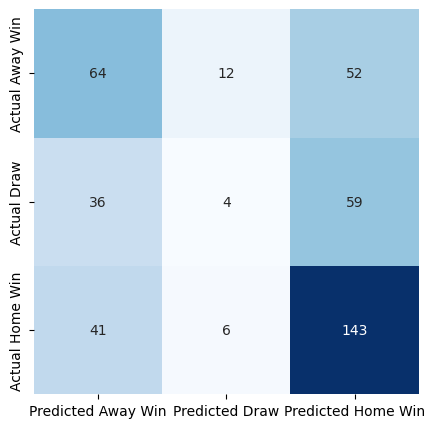

Accuracy score: 0.5060
Precision score: 0.3996
Recall score 0.4310
F1-score:       0.3954
False +ve:      12
False -ve:      36


In [ ]:
model = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth = 3, min_child_weight = 5,gamma=0, objective="multi:softmax")
model.fit(X_train,y_train)
xgb_pred = model.predict(X_test)
show_metrics(xgb_pred,y_test,True)


In [ ]:
xtesthome = [i[0] for i in X_test]
xtestaway = [i[13] for i in X_test]
df_pred_compare = pd.DataFrame({"Actual Result": y_test, "Predicted Result": xgb_pred, "Home Team": xtesthome,"Away Team": xtestaway})
df_pred_compare

,Actual Result,Predicted Result,Home Team,Away Team
0,2,2,1.0,22.0
1,0,1,5.0,1.0
2,2,2,22.0,5.0
3,2,2,4.0,3.0
4,2,2,22.0,7.0
...,...,...,...,...
412,2,2,6.0,23.0
413,1,2,4.0,8.0
414,1,2,17.0,7.0
415,1,2,1.0,24.0


In [ ]:
X_test_homeaway = X_test[:, [0,13]]
X_test_homeaway = X_test_homeaway.astype(int)

xtesthome_conv = enc_dict['Home Team'].inverse_transform([i[0] for i in X_test_homeaway])
xtestaway_conv = enc_dict['Away Team'].inverse_transform([i[1] for i in X_test_homeaway])
y_test_conv = enc_dict['Match Result'].inverse_transform(y_test)
xgb_pred_conv = enc_dict['Match Result'].inverse_transform(xgb_pred)

In [ ]:
df_pred_compare_conv = pd.DataFrame({"Actual Result": y_test_conv, "Predicted Result": xgb_pred_conv, "Home Team": xtesthome_conv,"Away Team": xtestaway_conv})
df_pred_compare_conv

,Actual Result,Predicted Result,Home Team,Away Team
0,Home Win,Home Win,Aston Villa,Tottenham
1,Away Win,Draw,Burnley,Aston Villa
2,Home Win,Home Win,Tottenham,Burnley
3,Home Win,Home Win,Brighton,Brentford
4,Home Win,Home Win,Tottenham,Crystal Palace
...,...,...,...,...
412,Home Win,Home Win,Chelsea,Watford
413,Draw,Home Win,Brighton,Everton
414,Draw,Home Win,Newcastle Utd,Crystal Palace
415,Draw,Home Win,Aston Villa,West Ham


In [ ]:
teamsenc = X[:,0]
teamsenc = np.array(teamsenc)
teamsenc = teamsenc.astype(int)

teams_enc_conv = enc_dict['Home Team'].inverse_transform(teamsenc)
df_teamsenc = pd.DataFrame({"Team": teams_enc_conv, "Team encoded" : teamsenc})
df_teamsenc.drop_duplicates(subset=['Team'], inplace = True)
df_teamsenc = df_teamsenc.sort_values('Team encoded')
df_teamsenc = df_teamsenc.reset_index(drop=True)
df_teamsenc


,Team,Team encoded
0,Arsenal,0
1,Aston Villa,1
2,Bournemouth,2
3,Brentford,3
4,Brighton,4
5,Burnley,5
6,Chelsea,6
7,Crystal Palace,7
8,Everton,8
9,Fulham,9


In [ ]:
df_resultenc = pd.DataFrame({"Result":xgb_pred_conv, "Result encoded":xgb_pred})
df_resultenc.drop_duplicates(subset=['Result'], inplace = True)
df_resultenc = df_resultenc.sort_values('Result encoded')
df_resultenc = df_resultenc.reset_index(drop=True)
df_resultenc

,Result,Result encoded
0,Away Win,0
1,Draw,1
2,Home Win,2


In [ ]:
#df_teamenc = pd.DataFrame({"Team": [i[0] for i in X_test_homeaway],"Team Encoded":xtesthome_conv})
#df_teamenc.drop_duplicates(subset=['Team'], inplace = True)
#df_teamenc = df_teamenc.sort_values('Team')
#df_teamenc = df_teamenc.reset_index(drop=True)
#df_teamenc

In [ ]:
#df_pred_compare.to_csv(r'C:\Users\andre\Documents\Andreas Personal Project\Stored predictions\testpredraw.csv', encoding='utf-8', index=False)
#df_pred_compare_conv.to_csv(r'C:\Users\andre\Documents\Andreas Personal Project\Stored predictions\testpreds.csv', encoding='utf-8', index=False)
df_teamsenc.to_csv('{}/Encode tables/teamencoding.csv'.format(root), encoding='utf-8', index=False)
df_resultenc.to_csv('{}/Encode tables/resultencoding.csv'.format(root), encoding='utf-8', index=False)

In [ ]:
import joblib
joblib.dump(value=model, filename='{}/football-match-prediction-model.pkl'.format(root))

['/content/drive/MyDrive/Andreas personal project/football-match-prediction-model.pkl']